In [24]:
import pandas as pd
import numpy as np
import math
from statistics import mean, median

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
%cd '/content/drive/MyDrive/CSE544_PROJECT'
# %ls -l

/content/drive/.shortcut-targets-by-id/1YQyVsZWGB7sACOZzGllQA0QwFc_E5Nb1/CSE544_PROJECT


In [27]:
from datetime import datetime as dt
import datetime

start = datetime.datetime(2020, 10, 1)
end = datetime.datetime(2020, 12, 31)
df_clean = pd.read_csv('clean_organised.csv')

def get_data(start, end, df_clean):
  MT_daily_cases = [int(df_clean['MT daily cases'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  NC_daily_cases = [int(df_clean['NC daily cases'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  MT_daily_death = [int(df_clean['MT daily death'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  NC_daily_death = [int(df_clean['NC daily death'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  return MT_daily_cases, NC_daily_cases, MT_daily_death, NC_daily_death

MT_daily_cases, NC_daily_cases, MT_daily_death, NC_daily_death =  get_data(start, end, df_clean)

In [11]:
# poisson

import matplotlib.pyplot as plt
from scipy.stats import poisson

def poisson_points(lam, n):
  points = []
  for i in range(int(n)):
      y = poisson.cdf(i, lam)
      points.append(y)
  return points

def poisson_KS(sample_A, sample_B):
  sample1=np.array(sample_A)
  sample2=np.array(sample_B)
  lambda_mme_mtdeath = sample1.mean()
  lst=[]
  k=0
  for index, x in enumerate(sample2):
      k += x
      lst.append(k)
  lst=np.array(lst)
  lst=lst/k
  maxp = max(sample2)
  points = poisson_points(lambda_mme_mtdeath, int(max(sample2)))
  list_1 = list(sample2)
  list_2 = np.array(points)
  list_1=np.sort(list_1)
  y1=np.ones(int(max(sample2)))
  y2=np.ones(int(max(sample2)))
  max_1=0
  max_p=0
  i = 0
  for n in range(int(max(sample2))):
      temp1 = np.searchsorted(list_1,n,side='right')/len(list_1)
      temp2 = np.searchsorted(list_1,n,side='left')/len(list_1)
      y1[n] = temp1
      y2[n] = list_2[i]
      z1=max(abs(temp1-y2[n]),abs(temp2-y2[n]))
      if z1>max_1:
          max_1 = z1
          max_p = n
      i+=1
  print(max_p)
  print(max_1)
  if max_1>0.05:
    print("Hypothesis Rejected")
  else:
    print("Hypothesis Accepted")
  plt.plot(np.arange(int(max(sample2))), y1, label = "eCDF for second state")
  plt.plot(np.arange(int(max(sample2))), y2, label = "CDF for poisson dist using MME estimator from first state")
  plt.axvline(x=max_p)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  

16
0.930208449695998
Hypothesis Rejected


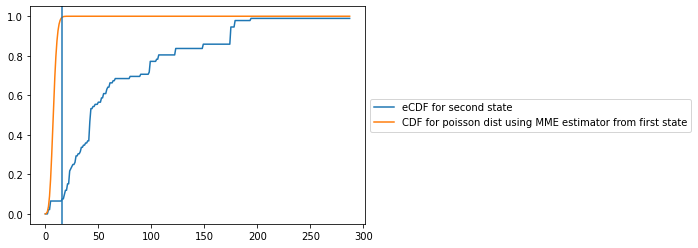

In [12]:
poisson_KS(MT_daily_death, NC_daily_death)

980
0.9782608695652174
Hypothesis Rejected


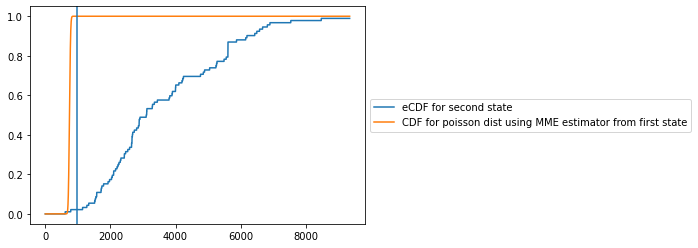

In [13]:
poisson_KS(MT_daily_cases, NC_daily_cases)

In [14]:
# Geometric

def geo_points(p, n):
    points = []
    x=0
    for i in range(n):
        x=1-((1-p)**(i))
        points.append(x)
    return points

def geometric_KS(sample_A, sample_B):
  sample1=np.array(sample_A)
  sample2=np.array(sample_B)
  p_mme_mtdeath = 1/sample1.mean()
  lst=[]
  k=0
  for index, x in enumerate(sample2):
      k+=x
      lst.append(k)
  lst=np.array(lst)
  lst=lst/k

  maxp = np.max(sample2)
  points = geo_points(p_mme_mtdeath, int(max(sample2)))

  list_1 = list(sample2)
  list_2 = np.array(points)
  list_1=np.sort(list_1)
  y1=np.ones(int(max(sample2)))
  y2=np.ones(int(max(sample2)))
  max_1=0
  max_p=0
  i = 0
  for n in range(int(max(sample2))):
      temp1 = np.searchsorted(list_1,n,side='right')/len(list_1)
      temp2 = np.searchsorted(list_1,n,side='left')/len(list_1)
      y1[n] = temp1
      y2[n]=list_2[i]
      # z1=abs(y1[n]-y2[n])
      z1=max(abs(temp1-y2[n]),abs(temp2-y2[n]))
      if z1>max_1:
          max_1 = z1
          max_p = n
      i+=1
  print(max_1)
  print(max_p)
  if max_1>0.05:
    print("Hypothesis Rejected")
  else:
    print("Hypothesis Accepted")
  
  plt.plot(np.arange(int(max(sample2))), y1, label = "eCDF for second state")
  plt.plot(np.arange(int(max(sample2))), y2, label = "CDF for poisson dist using MME estimator from first state")
  plt.axvline(x=max_p)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

0.828442430917523
18
Hypothesis Rejected


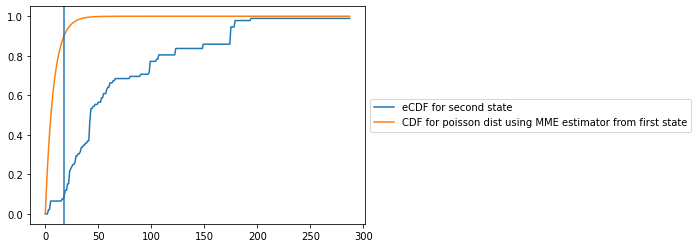

In [15]:
geometric_KS(MT_daily_death, NC_daily_death)

0.8157381468179481
1515
Hypothesis Rejected


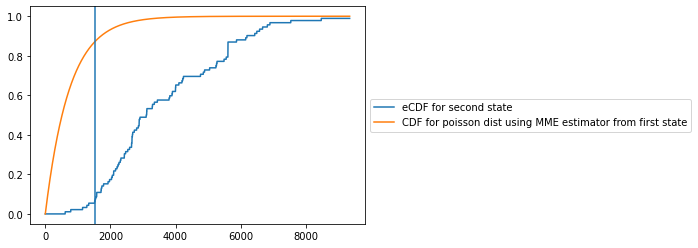

In [16]:
geometric_KS(MT_daily_cases, NC_daily_cases)

In [17]:
#binomial

import math
import scipy.special
from scipy.stats import binom

def binomial_points(p, n, total):
    points = []
    x=0
    for k in range(total):
        #y = scipy.special.binom(n, k) * (p**k) * (1-p)**(n-k)
        #x+=y
        x = binom.cdf(k, n, p)
        points.append(x)
    return points

def binomial_KS(sample_A, sample_B):
  sample1=np.array(sample_A)
  sample2=np.array(sample_B)
  mean = sample1.mean()
  print(mean)
  var = np.var(sample1)
  # sd = var**0.5
  print(var)
  p = 1 - var/mean
  # n = mean**2/(mean - var)
  n = mean/p
  # p = mean/n
  print(p,n)
  lst=[]
  k=0
  for index, x in enumerate(sample2):
      k+=x
      lst.append(k)
  lst=np.array(lst)
  lst=lst/k
  
  maxp = np.max(sample2)
  points = binomial_points(p, n, int(max(sample2)))
  # print(points)
  list_1 = list(sample2)
  list_2 = np.array(points)
  list_1=np.sort(list_1)
  y1=np.ones(int(max(sample2)))
  y2=np.ones(int(max(sample2)))
  max_1=0
  max_p=0
  i = 0
  for n in range(int(max(sample2))):
      temp1 = np.searchsorted(list_1,n,side='right')/len(list_1)
      temp2 = np.searchsorted(list_1,n,side='left')/len(list_1)
      y1[n] = temp1
      y2[n]=list_2[i]
      z1=z1=max(abs(temp1-y2[n]),abs(temp2-y2[n]))
      if z1>max_1:
          max_1 = z1
          max_p = n
      i+=1
  print(max_1)
  print(max_p)
  if max_1>0.05:
    print("Hypothesis Rejected")
  else:
    print("Hypothesis Accepted")
  
  plt.plot(np.arange(int(max(sample2))), y1, label = "eCDF for second state")
  plt.plot(np.arange(int(max(sample2))), y2, label = "CDF for poisson dist using MME estimator from first state")
  plt.axvline(x=max_p)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

8.173913043478262
41.7523629489603
-4.108001850138759 -1.9897539829983681
1.0
0
Hypothesis Rejected


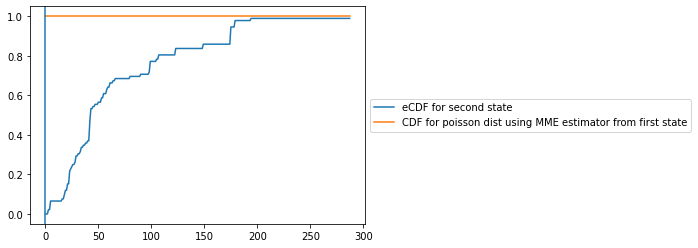

In [18]:
binomial_KS(MT_daily_death, NC_daily_death)

742.8260869565217
76911.90453686201
-102.53958468526932 -7.244286089479695
1.0
0
Hypothesis Rejected


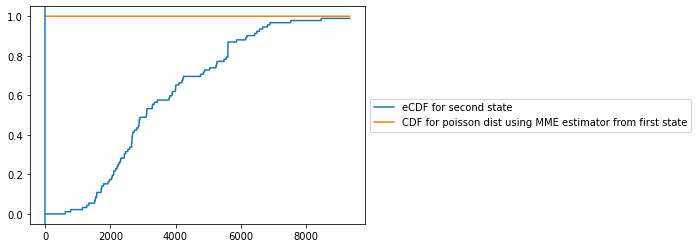

In [19]:
binomial_KS(MT_daily_cases, NC_daily_cases)

In [20]:
#ks two sample test 

def ks_2_sample(sample_A, sample_B):

  list_1 = np.array(sample_A)
  list_2 = np.array(sample_B)
  list1=np.sort(list_1)
  list2=np.sort(list_2)
  size=int(max(max(list1), max(list2)))
  y1=np.ones(size)
  y2=np.ones(size)
  max_1=0
  max_p=0
  # print(int(max(list1)))
  # print(int(max(list2)))
  d = []
  for n in range(int(max(max(list1), max(list2)))):
      # print(n)
      

      n=int(n)
      y1[n]=np.searchsorted(list_1,n,side='right')/len(list_1)
      y2[n]=np.searchsorted(list_2,n,side='right')/len(list_2)
      if n in list1:
        z1=max(abs(y1[n]-y2[n]), abs(np.searchsorted(list_1,n,side='left')/len(list_1)-y2[n]))
        if z1>max_1:
            max_1 = z1
            max_p = n
  # y1, y2, max_1, max_p
  print(max_1)
  print(max_p)
  if max_1>0.05:
    print("Hypothesis Rejected")
  else:
    print("Hypothesis Accepted")
  plt.plot(np.arange(int(max(max(list1), max(list2)))), y1, label = "eCDF for first state")
  plt.plot(np.arange(int(max(max(list1), max(list2)))), y2, label = "eCDF for second state")
  # plt.axvline(x=max_p)
  # plt.plot(np.arange(int(max(sample2))), y1, label = "eCDF for second state")
  # plt.plot(np.arange(int(max(sample2))), y2, label = "CDF for poisson dist using MME estimator from first state")
  plt.axvline(x=max_p)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

1.0
1144
Hypothesis Rejected


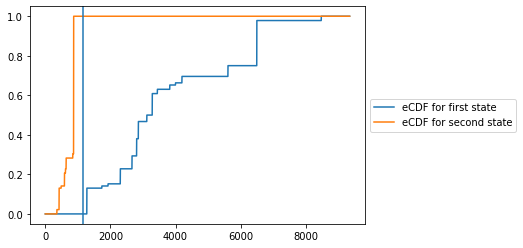

In [21]:
ks_2_sample(NC_daily_cases, MT_daily_cases)

0.7934782608695652
16
Hypothesis Rejected


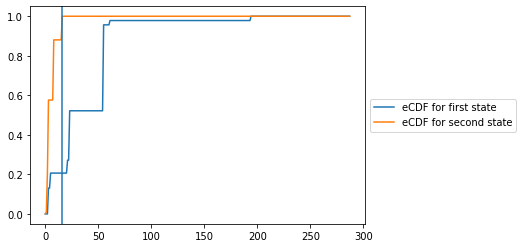

In [22]:
ks_2_sample(NC_daily_death, MT_daily_death)

In [23]:
# permutation test
def permutation_test(sample_A, sample_B):
  count = 0
  list_1 = []
  list_1.append(sample_A)
  list_0 = []
  list_0.append(sample_B)

  list_1 = np.array(list_1)
  list_0 = np.array(list_0)
  mean_1 = np.mean(list_1)
  mean_0 = np.mean(list_0)
  t_obs = np.abs(mean_1-mean_0)
  a = np.concatenate((list_1[0], list_0[0]))
  # print(len(list_1[0]))
  iterations=1000
  for _ in range(iterations):
      np.random.shuffle(a)
      a_0 = np.abs(np.mean(a[0:len(list_1[0])]) - np.mean(a[len(list_1[0]):]))
      if (a_0>t_obs):
          count+=1
  print(count)
  if(count/iterations<=0.05):
      print("Hypothesis rejected")
  else:
      print("Hypothesis accepted")

permutation_test(NC_daily_cases, MT_daily_cases)
permutation_test(NC_daily_death, MT_daily_death)

0
Hypothesis rejected
0
Hypothesis rejected
